In [1]:
# Imports
import pandas as pd
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import random

%matplotlib inline

In [2]:
# Preparing Directories
dfs = pd.read_csv(path.join('shots.csv'))
dfg = pd.read_csv(path.join('games.csv'))
dft = pd.read_csv(path.join('teams.csv'))

map_img = mpimg.imread('nba_court.jpg')

In [3]:
# Processing Data
cats2 = ['layup','pullup','float','dunk','hook','fadeaway','step']

# Creating a new category for jumps
# If sum = 0 (cats2 doesnt have True), True to 'jump'; else assigns False
dfs['jump'] = dfs[cats2].sum(axis=1) == 0

# Creating a new column for the actual shot type
dfs['shot_type'] = np.nan
for shot in cats2 + ['jump']:
    dfs.loc[dfs[shot], 'shot_type'] = shot

In [4]:
# Previewing the new shots dataframe
pd.set_option('display.max_columns', None)
dfs.head()

,name,dist,value,made,desc,team,opp,x,y,player_id,game_id,event_id,shot_id,running,jump,hook,layup,driving,dunk,alley,reverse,turnaround,fadeaway,bank,finger,putback,float,pullup,step,cutting,tip,zone,area,date,period,min_left,sec_left,shot_type
0,L. James,2,2,True,Layup Shot,LAC,LAL,-9,23,2544,21900002,7,0021900002-007,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Less Than 8 ft.,Center(C),20191022,1,11,47,layup
1,L. Shamet,26,3,False,Pullup Jump shot,LAC,LAL,201,178,1629013,21900002,9,0021900002-009,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,24+ ft.,Right Side Center(RC),20191022,1,11,40,pullup
2,D. Green,25,3,True,Jump Shot,LAC,LAL,125,221,201980,21900002,11,0021900002-011,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,24+ ft.,Right Side Center(RC),20191022,1,11,23,jump
3,P. Beverley,26,3,False,Jump Shot,LAC,LAL,117,239,201976,21900002,13,0021900002-013,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,24+ ft.,Right Side Center(RC),20191022,1,11,0,jump
4,A. Davis,18,2,False,Jump Shot,LAC,LAL,96,162,203076,21900002,15,0021900002-015,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16-24 ft.,Right Side Center(RC),20191022,1,10,47,jump


In [5]:
# Coordinates for the shot => Used for shot chart (miss vs make)
dfs[['name','dist','made','x','y']].head()

,name,dist,made,x,y
0,L. James,2,True,-9,23
1,L. Shamet,26,False,201,178
2,D. Green,25,True,125,221
3,P. Beverley,26,False,117,239
4,A. Davis,18,False,96,162


In [6]:
# Creating a shot chart function that graphs the coordinates
# Since scatter plot has multiple features, **kwargs allows access to those
def shot_chart(df, **kwargs):
    # Choosing a scatter plot 
    g = sns.relplot(data=df, x='x', y='y', kind='scatter',**kwargs)

    # Setting the x and y limits, along with making shot chart blank
    g.set(xlim=(-250,250), ylim=(-50,400), yticks=[], xticks=[], xlabel=None, ylabel=None)
    g.despine(left=True, bottom=True)

    # For every coordinate, it will be drawn on top of map_img
    for ax in g.fig.axes:
        ax.imshow(map_img,zorder=0, extent=[-250, 250, -30, 400])
    
    return g

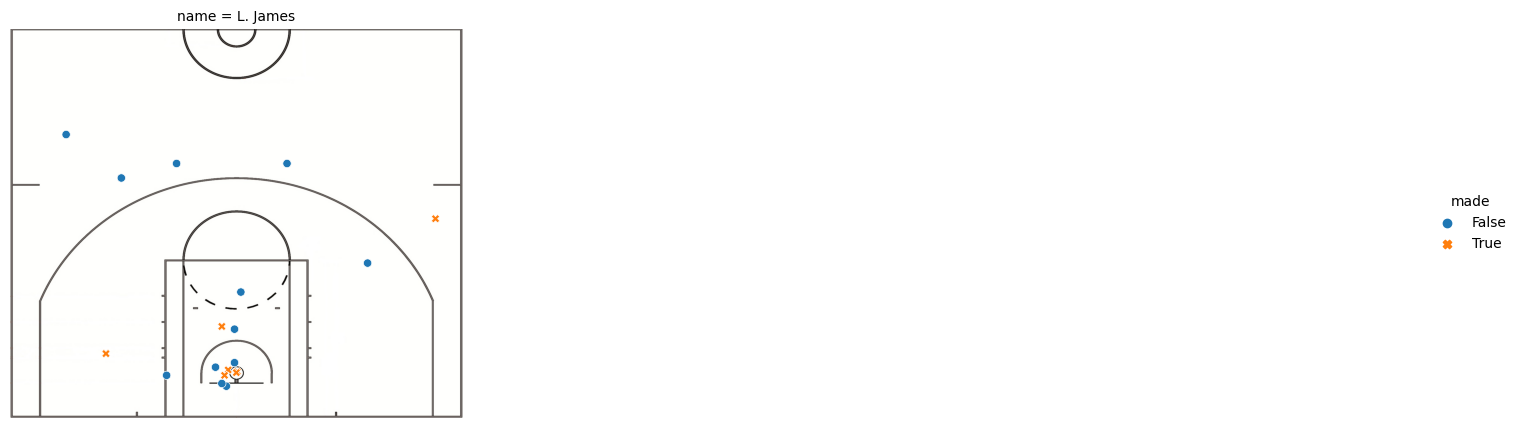

In [9]:
# Finding the shot tendencies of Lebron James vs LAC (2019/10/22) for LAC scouting report
g2 = shot_chart(dfs.query("name == 'L. James' and game_id == 21900002"), hue='made', style='made',
        col='name', col_wrap = 3)

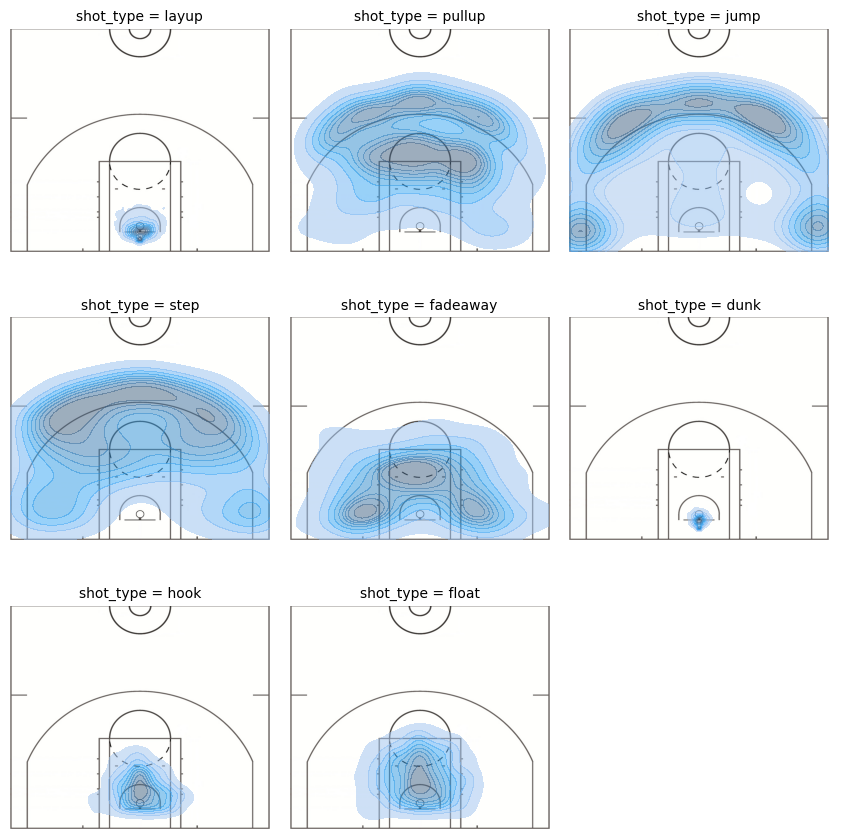

In [8]:
# Heat Map of common shots in 2019-2020 Season
g1 = (sns.FacetGrid(dfs, col='shot_type',col_wrap=3)
    .map(sns.kdeplot, 'x', 'y', alpha=0.5, shade=True)
    .add_legend())
g1.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
g1.despine(left=True, bottom=True)
for ax in g1.fig.axes:
    ax.imshow(map_img, zorder=0, extent=[-250, 250, -30, 400])